# Classification Problems

**Classification problems** are problems where we would like to take datapoints and assign them to an appropriate **class** based on some examples that have known classes.

## Examples

* If we have a dataset of medical records where each datapoint has a single patient's age, weight, blood pressure, status as a smoker or not, and other information and each patient is known to either have or not have kidney disease. We might want take data from a new patient and predict if he or she is likely to develop kidney disease.

* If we have a dataset of labeled images of cat and dogs, we might want to take a new image and classify whether it has a dog or a cat. (How does Google image search know how to find pictures of what you search?)

* If we have a dataset of audio files, each of which is a jazz, classical, rock, pop, or hip-hop song, we might want to predict the genre of a new audio file. (Spotify does this kind of analysis to recommend songs based on your listening history.)

* If we have a dataset of traffic logs on a network, some known to be infected by a specific virus and some are not, we might want to use this information to classify a new traffic log as likely to be infected or not.

* If we have a dataset of sounds of people speaking along with transcripts of the words, we might want to classify the words spoken into a microphone. (Think Siri!)

In all of these cases, the information can be represented as a point in the $n$-dimensional real space.

* The medical records would have numbers for age, weight, and blood pressure and a binary digit for non-smoker or smoker.

<img src="images/medicalRecords.png" />

* The dog/cat images might have three channels for a picture, meaning three numbers for each pixel (the red, green, and blue levels) like the bird picture below.

<img src="images/birdRGB.png" />

* The audio files might have numbers specifying the type of sound for the song many times per second.

<img src="images/audioFile.png" />

* The network traffic logs might have numbers of packets transferred, file size, ports, addresses, the content of the packets, etc.

* The audio files might have numbers specifying the type of sound for a word many times per second.

<img src="images/audioWords.png" />
The blue lines indicate the beginning of a word and the red lines indicate the ends of words.

In all mature applications, there are likely preprocessing steps done before the classification is done.

I chose these applications to demonstrate two things: (1) classification problems are interesting and useful in almost every area of study and (2) a huge class of classification problems have much in common mathematically. All apply to datapoints, although some types of data may have far more dimensions than others--a medical record may only have 10 to 12 numbers, but a 12-megapixel photo from the latest iPhone would have $4,000\times 3,000\times 3=36,000,000$ numbers, 3 for each pixel).

## The Math of a Classification Problem

To exploit the similarities, let's abstract away the specifics of the applications for now and think about how to describe a classification problem mathematically. Consider a $d$-dimensional point, or vector, $x_1\in\mathbb{R}^d$ and denote $x=(x_{11},x_{12},...,x_{1d})$. $x$ is a member one of $k$ classes $C=\{c_1, c_2, ..., c_k\}$. We call the point $x_1$ an **example** and we call the class the **label** of $x_1$.

The goal of a classification problem is to find a function $f:\mathbb{R}^d\to C$ mapping each example $x_1$ to its class $y_1=f(x_1)$ and will generalize to successfully classify new, unlabeled datapoints with high accuracy.

This will segment the space $\mathbb{R}^d$ into sets $C_j=\{x_1\in\mathbb{R}^d | f(x_1)=c_j\}$ corresponding to each class. In the image below, for example, the space $\mathbb{R}^2$ is partitioned into three sets colored red, blue, and green.

<img src="images/knnTessellation.png" />
The colored points are labeled examples and the $\mathbb{R}^2$ space is colored by the class to be assigned to points in different regions. (image from Wikipedia)

### Classification Algorithms

There are many algorithms used for classification. Some of the most popular include

* $k$-nearest neighbor classifier
* support vector classifier
* naive Bayes classifier
* decision trees
* logistic regression
* neural networks (many types)

as well as tree-based algorithms that systematically apply an ensemble of different classifiers.

This course focuses on neural networks, which presently outperform other methods on large datasets, and especially for classifying high-dimensional data like images. However, I recommend using the simpler methods as benchmarks for classification problems before using neural networks because they generally require far less computation. Beyond that, it is helpful to start with a simpler algorithm to build some understanding of the norms of machine learning because much of these ideas are used in all classification problems.

Any of the methods above are good choices, but we only consider the simplest of all, the $k$-nearest neighbor classifier before continuing to neural networks. My hope is that you will build enough understanding of classification problems that you will easily be able to deploy any algorithm you choose.

# k-Nearest Neighbors Classifier

The $k$-nearest neighbor classifier tries to classify numerical examples into categories. Suppose we have some labeled examples $x_1, ..., x_n\in\mathbb{R}^d$ with labels $y_1, ..., y_n$. If we have a new, unlabeled point $x$, we would like to predict its class label. The idea of the $k$-nearest neighbor algorithm is that we take the $k$ labeled examples nearest to $x$ and assign the most frequent class of these nearest "neighbors" to $x$.

## Distance Metrics

Let $d(x_1,x_2)=\|x_1-x_2\|$ be the distance from $x_1$ to $x_2$. The specific formula we use is called the **distance metric** and the function $\|\cdot\|:\mathbb{R}^d\to[0,\infty)$ is called a **norm**. The most used norms are from the family of $L^p$ distances for each number $p>0$. (Note that mathematicians would likely refer to this as simply the $p$-norm for a finite dimensional space.) Distances between points are computed with the $L^p$-norm as

$$\left\|x_1-x_2\right\|_p =\left(\sum\limits_{i=1}^d |x_{1i}-x_{2i}|^p\right)^{1/p}$$

* If $p=1$, we get what is called the **taxi-cab** or **Manhattan distance** because, geometrically, the distance from (4, 6) to (8, 15) is the distance to drive along city blocks from 4th street and 6th avenue to 8th street and 15th avenue. It is computed as

$$\left\|x_1-x_2\right\|_1= \left|x_{11}-x_{21}\right|+\cdots+\left|x_{1d}-x_{2d}\right|$$

* If $p=2$, we get the familiar **Euclidean distance**, the straight-line distance in flat space you have certainly encountered in elementary algebra and calculus courses,

$$
\left\|x_1-x_2\right\|_2=\sqrt{\left(x_{11}-x_{21}\right)^2+\cdots+\left(x_{1d}-x_{2d}\right)^2}$$

* If $p=\infty$, we get what is called the **supremum** or **maximum distance** and it is calculated as

$$\left\|x_1-x_2\right\|_\infty= \max\limits_{i=1,...,d}\left|x_{1i}-x_{2i}\right|=\max\{|x_{11}-x_{21}|, ..., |x_{1d}-x_{2d}|\}$$

For now, let's use the Euclidean distance because it is intuitive if for no other reason, but any of these $L^p$ norms may be used as can any other <a href="https://en.wikipedia.org/wiki/Norm_(mathematics)#Definition">norm</a> (see 2.5 in Goodfellow et. al.).

## The Procedure to Classify an Example $x$ with $k$-Nearest Neighbors

1. Choose a positive integer for $k$.

1. Find the distances $\left\|x-x_j\right\|$ for each $j=1,...,n$ with any norm you choose.

1. Find the points with the $k$ shortest distances from $x$ (the $k$ nearest "neighbors").

1. Assign the most frequent class among the $k$ nearest neighbors to $x$

This means we need to make only two decisions two use the $k$-nearest neighbors: we need to choose a norm and we need to choose the number of neighbors $k$ to use. Customizable parameters for a machine learning method like this $k$-nearest neighbor classifier are called **hyperparameters**. It is not generally obvious how to choose these hyperparameters and it tends to be pretty experimental. Tuning hyperparameters is a large part of machine learning.

## Training a Classifier

If we have a dataset of labeled data, a very common approach is to split the dataset into two parts: the training set and the testing set. We remove the labels from the testing set, "train" the classifier with the training set, and use the resulting model to attempt to classify the testing set.

This way, we can measure the success of our classifier on data it has never seen (the testing set). Once we become confident our classifier works well in this way, we can be more confident about the success of the classifier in the real-world.

My preferred approach is to use the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">train_test_split</a> function from the <a href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection">scikit-learn.model_selection</a> library to randomly assign a specified percentage (usually 50-75%) of the dataset to the training set and the rest to the testing set.

## $k$-Nearest Neighbor Code

Let's write some code. I will use the style used by the popular machine learning library <a href="https://scikit-learn.org/stable/">scikit-learn</a>, where a classifier is written as a class in the programming sense (not to be confused with the "classes" of our classification problem) with hyperparameters as inputs. The classifier's class will have some functions that fit the model to the data and predict the class of input datapoints.

The 'fit' function for the $k$-nearest neighbors will do very little but record some data. The 'predict' function will carry out steps 1-4 above.

First, we import some things we will use.

* <a href="https://numpy.org/">NumPy</a> - a package for computing in Python

* <a href="https://matplotlib.org">matplotlib</a> - a library for plotting similarly to MATLAB

* <a href="https://www.scipy.org/">SciPy</a> - a library for scientific computing in Python (we import a function to find modes)

* <a href="https://scikit-learn.org/">scikit-learn</a> - a library for machine learning (we import functions for splitting data into training and testing data and for measuring success of a classifier as well as an implementation of the $k$-nearest neighbors classifier)

* <a href="https://www.tensorflow.org/">TensorFlow</a> - a framework for deep learning (we only import some datasets)

In [1]:
import numpy as np
from scipy.stats import mode
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10

# increase the width of boxes in the notebook file (this is only cosmetic)
np.set_printoptions(linewidth=180)

Next, let's write a Python class for the $k$-nearest neighbor classifier using only the Euclidean norm for distance calculations.

We need to store the datapoints of the training set in a data structure. In most of the course, we will be converting datapoints into vectors, which we will store as rows of a data matrix we will generally call $X$:

$$
\begin{align*}
X = \begin{pmatrix}
x_1^T\\
x_2^T\\
\vdots \\
x_n^T
\end{pmatrix}
= \begin{pmatrix}
x_{11} & x_{12} & \cdots & x_{1d}\\
x_{21} & x_{22} & \cdots & x_{2d}\\
\vdots & \vdots & \ddots & \vdots\\
x_{n1} & x_{n2} & \cdots & x_{nd}
\end{pmatrix}
\end{align*}
$$

Note that each *row* contains all the data from a single datapoint while each *column* contains the data from a single variable (or feature) for all datapoints. Therefore, we will iterate over the rows when we find the distances to our input datapoint to each other datapoint.

In [13]:
# Create a class for the k-nearest neighbor classifier
class kNearestNeighborClassifier:
    # constructor to save the hyperparameter k
    def __init__(self, k = 5):
        # initialize the number of neighbors to use
        self.neighbors = k
        
        # print a warning if k is even
        #if k % 2 == 0:
        #    print('[WARNING] An odd number is recommended for k to avoid tie votes in the kNN classifier.')
    
    # fit the model to the training data (for kNN, there's no actual fitting involved)
    def fit(self, X, y):
        '''
        Record the class labels for training data
        
        Inputs
        ------
        
        X: a matrix of datapoints from the training data, each row is a point
        y: a vector of labels for each datapoint
        
        '''
        
        # record the unique class labels
        self.classes = np.unique(y)
        
        # print a warning if we only input one class
        if self.classes.shape[0] < 2:
            print('[WARNING] There should be at least two classes in the input data.')
            
        # record the data and labels
        self.data = X
        self.labels = y
    
    # use the classifier to predict the classifications of the testing data
    def predict(self, X):
        '''
        Predict the class labels for the input data
        
        Inputs
        ------
        
        X: a matrix of datapoints from the testing data, each row is a point
        
        Outputs
        -------
        
        classes: the class predicted by the k-nearest neighbor classifier for each testing datapoint
        
        '''
        # initialize the predicted classes
        yPredicted = np.empty([X.shape[0],1])
        
        # loop over the datapoints in X
        for row in range(X.shape[0]):
            datapoint = X[row,]
            
            # find the distances from the datapoint to each training point using the L2 norm
            distances = np.sqrt(np.sum(((self.data - datapoint)**2), axis = 1))
            
            # find the indices of the smallest k distances
            indices = np.argsort(distances)[:self.neighbors]
            
            # find the the class labels of the nearest neighbors
            nearestClasses = self.labels[indices]
            
            # determine the predicted class by finding the mode
            yPredicted[row] = int(mode(nearestClasses)[0][0])
            
        return yPredicted

Let's make up some data and run the algorithm.

## Example: 2D Data

In [14]:
# AN EXAMPLE WITH MANUALLY INPUT DATA

# create training data (n=2)
trainX = np.array([[1, 2], [3, 4], [-1, 3], [4, 2], [2, 2], [1, 1], [2, 3], [3, 3]])
trainY = np.array([1, 0, 1, 1, 0, 0, 1, 0])

# create testing data
testX = np.array([[4, 3], [0, 0], [1, 4], [2, 1]])
testY = np.array([1, 1, 1, 0])

# plot the training set
#plt.scatter(trainX[:,0], trainX[:,1], c = trainY, marker = '.')
#plt.scatter(testX[:,0],testX[:,1], marker='o')

# fit the model to the training data
model = kNearestNeighborClassifier(k = 3)
model.fit(trainX, trainY)

# predict the labels for the test dataset
predictions = model.predict(testX)

# print the predicted labels
print(predictions.T[0])

# print the real labels
print(testY)

[0. 0. 1. 0.]
[1 1 1 0]


As we see, our classifier is not very good at all here. The last two are correct, but the first two are incorrect. Not a great result, but it does confirm the code at least returns a valid attempt. This prompts a new question: how do we measure the success of a classifier?

## Measuring Success

 For a specific class labeled 1, we denote

$c_{00}$ is the number of test examples in class 0 classified in class 0 (true negatives)

$c_{01}$ is the number of test examples in class 0 classified in class 1 (false positives)

$c_{10}$ is the number of test examples in class 1 classified in class 0 (false negatives)

$c_{11}$ is the number of test examples in class 1 classified in class 1 (true positives)

These numbers are sometimes included in what is called a **confusion matrix**

$$
\begin{align}
\begin{pmatrix}
c_{00} & c_{01} \\
c_{10} & c_{11}
\end{pmatrix}
\end{align}
$$

There are a few different measures of success in common usage. Each one can be computed for each class.

* Accuracy

$$
\begin{align}
\text{Accuracy}=\frac{\text{# of true classifications}}{\text{# of test examples}}=\frac{c_{00}+c_{11}}{c_{00}+c_{01}+c_{10}+c_{11}}
\end{align}
$$



* Precision

$$
\begin{align}
\text{Precision}=\frac{\text{# of true positives}}{\text{# of positive classifications}}=\frac{c_{11}}{c_{01}+c_{11}}
\end{align}
$$

* Recall

$$
\begin{align}
\text{Recall}=\frac{\text{# of true positives}}{\text{# of positive examples}}=\frac{c_{11}}{c_{10}+c_{11}}
\end{align}
$$

* F1 Score

$$
\begin{align}
F_1=\frac{2\text{(precision)(recall)}}{\text{precision + recall}}
\end{align}
$$

It is convenient to use the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html">classification_report</a> function from the <a href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics">sklearn.metrics</a> module with inputs of the test set labels and then the labels predicted by the classifier. This will return the precision and recall for each class, accuracy, and some additional quality metrics.

In [15]:
# print the classification performance on the test set
print(classification_report(testY, predictions))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.33      0.50         3

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4



## Example: Randomly Generated 2D 

Let's try a larger scale, but somewhat artificial problem. Let's randomly generate three sets of points, each with a previously-chosen probability distribution, and see if we can reverse-engineer the points to classify which distribution they came from.

As is common in machine learning, we will set up a test for ourselves: we will randomly split the data into training (maintaining the labels) and test sets (setting aside the labels), fit the model to the labeled training data, and then see how well it can classify the test data.

[[ 2.63214665 -2.36792893]
 [-2.18102794 -3.39923078]
 [ 0.93511029 -6.14639698]
 ...
 [ 2.37733458  7.83355362]
 [-0.60402723  6.09465354]
 [ 2.10111185  6.4989797 ]]
              precision    recall  f1-score   support

           0       0.72      0.77      0.74       120
           1       0.83      0.75      0.79       127
           2       0.88      0.91      0.90       128

    accuracy                           0.81       375
   macro avg       0.81      0.81      0.81       375
weighted avg       0.81      0.81      0.81       375



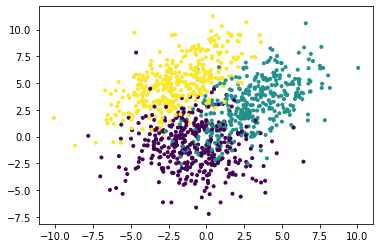

In [16]:
# AN EXAMPLE WITH RANDOMLY GENERATED POINTS

# set the seed so the code is reproducible
np.random.seed(1)

# number of points to generate
numberOfPoints = 500

# generate points from class 0
mean1 = np.array([-1, -1])
covariance1 = np.array([[5, 0], [0, 5]])
X1 = np.random.multivariate_normal(mean1, covariance1, numberOfPoints)

# generate points from class 1
mean2 = np.array([3, 3])
covariance2 = np.array([[5, 3], [3, 5]])
X2 = np.random.multivariate_normal(mean2, covariance2, numberOfPoints)

# generate points from class 2
mean3 = np.array([-2, 5])
covariance3 = np.array([[5, 3], [3, 5]])
X3 = np.random.multivariate_normal(mean3, covariance3, numberOfPoints)

# stack the points
X = np.vstack((X1, X2, X3))

# create a vector of the labels
Y = np.hstack((numberOfPoints * [0], numberOfPoints * [1], numberOfPoints * [2]))

# let's make sure the points are 2D points as we intended
print(X)

# randomly choose 75% of the data to be the training set and 25% for the testing set
(trainX, testX, trainY, testY) = train_test_split(X, Y, test_size = 0.25, random_state = 1)

# plot the training set
plt.scatter(trainX[:,0], trainX[:,1], c = trainY, marker = '.')

# fit the model to the training data
model = kNearestNeighborClassifier(k = 3)
model.fit(trainX,trainY)

# print the classification performance
from sklearn.metrics import classification_report
print(classification_report(testY, model.predict(testX)))

The plot color-codes the predetermined classes, and it is easy to see that there is some structure to the classes, although the points do overlap, so drawing the decision boundaries as in the previous colored diagram is not especially easy here. Nevertheless, the simple $k$-nearest neighbor classifier is 81% accurate.

In [17]:
# Confirming our results match scikit-learn
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 3)

model.fit(trainX,trainY)

print(classification_report(testY, model.predict(testX)))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74       120
           1       0.83      0.75      0.79       127
           2       0.88      0.91      0.90       128

    accuracy                           0.81       375
   macro avg       0.81      0.81      0.81       375
weighted avg       0.81      0.81      0.81       375



We see our quickly-constructed algorithm works as well as the implementation from scikit-learn.

## Example: Handwritten Digits

The Modified National Institute of Standards and Technology (MNIST) database contains 70,000 grayscale labeled images (each 28-by-28 pixels) of handwritten digits from US Census Bureau employees and high school students. Classifying the MNIST database is a common benchmark for machine learning techniques.

<img src='images/mnist.png' />

MNIST along with many other commonly-used datasets are available in the <a href="https://www.tensorflow.org/api_docs/python/tf/keras/datasets">tensorflow.keras.datasets</a> module. The first time you use the load_data() function, it will download the dataset, but any subsequent runs will just read it from the hard drive, if it has been downloaded before, so it runs much faster.

In [4]:
# load the MNIST data
from tensorflow.keras.datasets import mnist
mnistData = mnist.load_data()

Let's take a look at the data (press 'q' to iterate to the next image).

The label is 4
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.74 0.75 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.56 0.97 0.6  0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.53 0.97 0.95 0.34 0.   

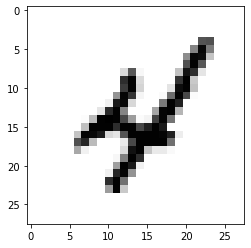

In [5]:
# DISPLAY MNIST PICTURES, DATA ARRAYS, AND LABELS
from IPython.display import clear_output
from keyboard import wait

for counter in range(10):
    # loop over the picture data
    pictureData = np.round(mnistData[0][0][counter]/255,2)

    # plot the datapoints and their labels
    print('The label is', mnistData[0][1][counter])
    print(pictureData)

    # plot the image
    plt.imshow(pictureData, cmap='Greys')
    plt.show()
    
    # wait until user presses 'q'
    wait('q')
    
    # clear the input
    clear_output(wait=True)

In [20]:
# Let's check the shape of the pictureData
pictureData.shape

(28, 28)

In order to compute distances between points for the $k$-nearest neighbor method, we need vectors rather than matrices, so we can **"flatten"** the rows into one long vector by using the reshape function, so we will do that before we start running the method.

In [21]:
### CLASSIFY MNIST PICTURES

# create a dataset of 1000 MNIST images, reshaped as single vectors, and labels

# The datapoints are in mnistData[0][0]
X = mnistData[0][0][:1000].reshape([1000,28*28])

# The labels are in mnistData[0][1]
Y = mnistData[0][1][:1000]

# randomly choose 75% of the data to be the training set and 25% for the testing set
(trainX, testX, trainY, testY) = train_test_split(X, Y, test_size = 0.25, random_state = 5)

# fit the model to the training data
model = kNearestNeighborClassifier(k = 5)
model.fit(trainX,trainY)

# print the classification performance
print(classification_report(testY, model.predict(testX)))

              precision    recall  f1-score   support

           0       0.33      0.45      0.38        22
           1       0.16      0.96      0.28        28
           2       0.00      0.00      0.00        28
           3       0.00      0.00      0.00        23
           4       0.00      0.00      0.00        19
           5       0.12      0.05      0.07        21
           6       0.24      0.16      0.19        25
           7       0.00      0.00      0.00        34
           8       0.08      0.08      0.08        24
           9       0.00      0.00      0.00        26

    accuracy                           0.18       250
   macro avg       0.09      0.17      0.10       250
weighted avg       0.09      0.18      0.10       250



C:\Users\Ryan\anaconda3\envs\DL\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accuracy is 0.18, which is pretty terrible, but it is better than random--we would expect accuracy of random classifications to be about 10%.

(Disregard the error, it is simply saying no points were predicted to be in classes '2', '3', '4', '7', or '9', so this results in dividing by 0 in the precision and recall calculations.)

To improve performance, there are a few changes we could make:

1. Change $k$

1. Normalize the data

1. Use a different distance metric

These are all **hyperparameters** we can **tune** to get a better fit. Tuning hyperparameters is a huge part of almost any machine learning task. 

Let's write a loop and find which $k$ gives the best accuracy.

In [22]:
# Tuning the hyperparameter neighbors
bestAccuracy = [0, 0]

# loop over different values of neighbors
for neighbors in range(1,20):
    # fit the model to the training data
    model = kNearestNeighborClassifier(k = neighbors)
    model.fit(trainX,trainY)
    
    # measure the accuracy of the fit (much less information that classification_report gives)
    accuracy = accuracy_score(testY, model.predict(testX))
    print(neighbors, accuracy)
    
    # if we find better accuracy than ever before, save it
    if accuracy > bestAccuracy[1]:
        bestAccuracy = [neighbors, accuracy]
        
# print the k and the accuracy with the best results
print(bestAccuracy)

1 0.22
2 0.212
3 0.196
4 0.188
5 0.176
6 0.184
7 0.184
8 0.18
9 0.2
10 0.196
11 0.188
12 0.192
13 0.188
14 0.184
15 0.176
16 0.176
17 0.18
18 0.18
19 0.172
[1, 0.22]


We improved the accuracy slightly to 0.22 by using $k=1$. We have tuned the hyperparameter $k$ to achieve better accuracy.

This still is not very good, so let's try normalizing.

## Normalizing Data

The idea of normalizing data can vary, but, in general, it simply means taking some data and changing the scale to some common scale we choose without distorting the differences ranges of the values.

In this example, every datapoint $x$ has grayscale values between 0 and 255. If we want to re-scale it to be from 0 to 1, we simply divide the datapoints by 255, so let's try that.

In [23]:
# randomly choose 75% of the data to be the training set and 25% for the testing set
# the random_state=1 makes the code reproducible
(trainX, testX, trainY, testY) = train_test_split(X, Y, test_size = 0.25, random_state = 3)

# rescale the X values to be in [0,1]
trainX = trainX/255.0
testX = testX/255.0

# fit the model to the training data
model = kNearestNeighborClassifier(k = 1)
model.fit(trainX,trainY)

# print the classification performance
print(classification_report(testY, model.predict(testX)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        30
           1       0.84      0.97      0.90        33
           2       0.88      0.70      0.78        20
           3       0.94      0.85      0.89        20
           4       0.93      0.72      0.81        18
           5       0.83      0.95      0.89        21
           6       0.88      1.00      0.94        29
           7       0.85      0.92      0.88        25
           8       1.00      0.81      0.90        27
           9       0.82      0.85      0.84        27

    accuracy                           0.89       250
   macro avg       0.89      0.87      0.88       250
weighted avg       0.89      0.89      0.89       250



With normalized data, our accuracy leaps to 0.89! This might not be good enough to use the method for real handwriting recognition tasks, but it's pretty impressive given that we used such a simple classifier.

Another way to normalize is to convert all the data from each pixel to have 0 mean and standard deviation 1 by subtracting the mean of each pixel value from the data and dividing by the standard deviation of the pixel values. We can use the standardize function from the preprocessing moddule of scikit-learn. Let's try this.

In [24]:
from sklearn.preprocessing import scale

# randomly choose 75% of the data to be the training set and 25% for the testing set
# the random_state=1 makes the code reproducible
(trainX, testX, trainY, testY) = train_test_split(X, Y, test_size = 0.25, random_state = 1)

# for each dimension, subtract the mean value and divide by the standard deviation
trainX = scale(trainX)
testX = scale(testX)

# fit the model to the training data
model = kNearestNeighborClassifier(k = 1)
model.fit(trainX,trainY)

# print the classification performance
print(classification_report(testY, model.predict(testX)))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        23
           1       0.90      1.00      0.95        43
           2       0.79      0.65      0.71        17
           3       0.89      0.93      0.91        27
           4       0.74      0.85      0.79        20
           5       0.88      0.81      0.84        26
           6       0.92      0.88      0.90        26
           7       0.86      0.67      0.75        27
           8       0.83      0.71      0.77        21
           9       0.67      0.80      0.73        20

    accuracy                           0.84       250
   macro avg       0.83      0.83      0.83       250
weighted avg       0.85      0.84      0.84       250



The accuracy here is a bit worse at 84%. While standardizing did not work as well as re-scaling the data to lie in [0,1], this may vary from problem to problem. Sometimes standardizing the data will do better.

Let's see how an optimized implementation of $k$-nearest neighbors compares.

In [25]:
# Confirming our results match scikit-learn
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 3)

model.fit(trainX,trainY)

print(classification_report(testY, model.predict(testX)))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        23
           1       0.81      1.00      0.90        43
           2       0.71      0.59      0.65        17
           3       0.83      0.89      0.86        27
           4       0.75      0.90      0.82        20
           5       1.00      0.77      0.87        26
           6       0.96      0.88      0.92        26
           7       0.76      0.59      0.67        27
           8       0.89      0.76      0.82        21
           9       0.75      0.75      0.75        20

    accuracy                           0.83       250
   macro avg       0.83      0.81      0.82       250
weighted avg       0.84      0.83      0.83       250



Under these circumstances the widely used scikit-learn implementation performs slightly worse at 83% accuracy, although it is only 1% worse, which we may chalk up to random variation since we have randomly split the data into training and testing sets.

## The CIFAR-10 Dataset

The CIFAR-10 dataset includes 60,000 colored images of size 32-by-32 pixels. Each pixel of the image has a red, a green, and a blue value, so the dimension of each image is 32 x 32 x 3 = 3072, where each RGB value of each pixel is a number between 0 and 255.

The images are classified as one of 10 classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, or truck.

<img src="images/cifar10.png" />

By looking at some of the images, it should become clear that using an algorithm to classify this dataset should be significantly harder than classifying MNIST because there is much more variation in images within each class than in MNIST.

In [29]:
from tensorflow.keras.datasets import cifar10 

cifarData = cifar10.load_data()

# 1st index: training [0] and testing [1] data and labels
# 2nd index: datapoints [0] and labels [1]
# 3rd index: image from the set (0-49999) for training and (0-9999) for testing
# 4th index: column of RGB triples for pixels in column (0-32)
# 5th index: RGB triple for each pixel in column (0-32)
# 6th index: R for pixel, G for pixel, B for pixel (0-2)

The label is [6]


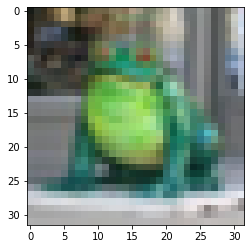

In [30]:
# DISPLAY CIFAR10 PICTURES
for counter in range(20):
    pictureData = cifarData[0][0][counter]
    # plot the datapoints and their labels
    print('The label is', cifarData[0][1][counter])
    #print(pictureData)

    # plot the image
    plt.imshow(pictureData)
    plt.show()
    
    # wait until user presses 'q'
    wait('q')
    
    # clear the input
    clear_output(wait=True)

In [31]:
cifarData[0][0][:1000].shape

(1000, 32, 32, 3)

A question you need to answer for your homework: how do we get this 32 x 32 x 3 image into a single 1-row datapoint?